In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import theano

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\HP\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
with pm.Model():
    rolls = pm.DiscreteUniform('rolls', lower=1, upper=6)
    trace = pm.sample(500)
trace['rolls']

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [rolls]
Sampling 2 chains: 100%|███████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 804.32draws/s]


array([4, 4, 1, 1, 2, 1, 3, 3, 3, 4, 4, 4, 3, 3, 3, 2, 2, 3, 3, 2, 1, 1,
       6, 6, 4, 4, 4, 4, 4, 6, 5, 5, 1, 1, 1, 4, 4, 4, 3, 6, 4, 3, 3, 5,
       5, 5, 5, 5, 6, 6, 6, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 5, 5, 4, 4,
       4, 4, 4, 6, 5, 5, 5, 1, 1, 1, 4, 4, 4, 3, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 3, 5, 5, 5, 5, 6, 4, 4, 3, 4, 4, 4, 5, 3, 1, 3, 5,
       5, 4, 3, 4, 3, 3, 6, 6, 6, 2, 2, 1, 3, 3, 3, 3, 2, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 4, 1, 1, 1, 1, 3, 3, 3, 3, 5, 5, 5, 5, 1, 1, 1, 4,
       5, 4, 4, 4, 4, 3, 3, 4, 2, 3, 3, 3, 3, 1, 4, 4, 3, 3, 3, 1, 1, 1,
       6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 6, 6, 5, 5, 6, 6,
       1, 1, 1, 6, 6, 6, 5, 5, 5, 5, 5, 5, 3, 3, 2, 2, 2, 1, 1, 1, 3, 3,
       6, 6, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 3, 5, 5, 5,
       5, 3, 3, 3, 2, 2, 1, 5, 5, 5, 4, 4, 4, 5, 1, 2, 2, 5, 2, 5, 3, 1,
       1, 1, 1, 1, 1, 5, 5, 4, 2, 6, 2, 3, 3, 5, 5, 5, 3, 3, 3, 3, 3, 3,
       6, 3, 3, 3, 3, 1, 1, 1, 2, 1, 2, 4, 5, 5, 5,

In [3]:
probs = np.array([0.1,0.2,0.3,0.2,0.1,0.1])
with pm.Model():
    rolls = pm.Multinomial('rolls', n=500, p=probs, shape=6)
    trace = pm.sample(1)

Only 1 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [rolls]
Sampling 2 chains: 100%|███████████████████████████████████████████████████████| 1002/1002 [00:02<00:00, 441.92draws/s]
C:\Users\HP\Anaconda3\lib\site-packages\pymc3\sampling.py:466: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")


In [5]:
observations = np.array([20, 6, 6, 6, 6, 6])
with pm.Model():
    probs = pm.Dirichlet('probs', a=np.ones(6))  # flat prior
    rolls = pm.Multinomial('rolls', n=50, p=probs, observed=observations)
    trace = pm.sample(500)
trace['probs']

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [probs]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 2000/2000 [00:43<00:00, 46.23draws/s]


array([[0.4022812 , 0.17249057, 0.11363752, 0.11109487, 0.07166704,
        0.1288288 ],
       [0.39799104, 0.11332793, 0.13811707, 0.08516864, 0.14028615,
        0.12510917],
       [0.36490369, 0.09136807, 0.12890178, 0.17569181, 0.11285197,
        0.12628268],
       ...,
       [0.25724053, 0.17153365, 0.09572336, 0.10277583, 0.26251827,
        0.11020836],
       [0.31299142, 0.08454266, 0.16548703, 0.17700626, 0.11364431,
        0.14632831],
       [0.33620488, 0.10919203, 0.20416874, 0.15873781, 0.09978849,
        0.09190806]])

<Figure size 504x504 with 0 Axes>

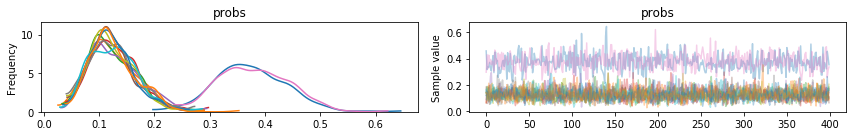

In [6]:
plt.figure(figsize=(7,7))
pm.traceplot(trace[100:])
plt.tight_layout();